# COVID-19 Daily State Tracking

This Juptyer Notebook is © 2020 Stacey Adams and is available under the  [MIT License](https://choosealicense.com/licenses/mit/).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import plotly.graph_objects as go

## Set the state you wish to process here

In [2]:
state = 'MO'

### State Abbreviation Table (collapsed by default)

In [3]:
# United States of America Python Dictionary to translate States,
# Districts & Territories to Two-Letter codes and vice versa.
#
# https://gist.github.com/rogerallen/1583593
#
# Dedicated to the public domain.  To the extent possible under law,
# Roger Allen has waived all copyright and related or neighboring
# rights to this code.

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico Commonwealth': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# thank you to @kinghelix and @trevormarburger for this idea
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

# build a dataframe for later use
state_abbrev = pd.DataFrame(data=abbrev_us_state.values(), index=abbrev_us_state.keys(), columns=["state name"])
state_abbrev.index.names = ['state']
#state_abbrev.head(5)

def highlight_selected_state(s):
    if s['state name'] == abbrev_us_state[state]:
        return ['background-color: yellow; color: black']*len(s)
    else:
        return ['']*len(s)

## Read the daily state data from covidtracking.com

The COVID Tracking Project data is published under a [Creative Commons CC BY-NC-4.0 license](http://creativecommons.org/licenses/by-nc/4.0/).

In [4]:
pd.set_option("precision", 4)
data_url = "http://covidtracking.com/api/states/daily.csv"
corona = pd.read_csv(data_url, parse_dates=['date'])
corona['testPositivityRate'] = corona['positiveIncrease'] * 100 / corona['totalTestResultsIncrease']
corona['weeks ago'] = (pd.Timestamp.now() - corona['date']).dt.days // 7
corona.head(5)

date state  positive  negative  pending  hospitalizedCurrently  \
0 2020-08-12    AK    4655.0  287927.0      NaN                   39.0   
1 2020-08-12    AL  104786.0  690985.0      NaN                 1372.0   
2 2020-08-12    AR   51114.0  522457.0      NaN                  486.0   
3 2020-08-12    AS       0.0    1396.0      NaN                    NaN   
4 2020-08-12    AZ  189443.0  854785.0      NaN                 1469.0   

   hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0                     NaN             NaN              NaN   
1                 12292.0             NaN           1282.0   
2                  3472.0             NaN              NaN   
3                     NaN             NaN              NaN   
4                 19821.0           519.0              NaN   

   onVentilatorCurrently  ...  hospitalizedIncrease  \
0                    3.0  ...                     0   
1                    NaN  ...                   222   
2                  113.0  ...                    71   
3                    NaN  ...                     0   
4                  328.0  ...                   529   

                                       hash commercialScore  \
0  04d3f681722d466f15660e1ded53888693484520               0   
1  3b8e75d37adb9ba3951ec8b2aae85ba1fa9b02f1               0   
2  614656008210925b859900619d0426d793e79029               0   
3  f6988932e32e01718e47c8647131e3311e70d481               0   
4  83481965d3dca76744e02ade2b8ec71c6fec31b7               0   

  negativeRegularScore negativeScore positiveScore  score  grade  \
0                    0             0             0      0    NaN   
1                    0             0             0      0    NaN   
2                    0             0             0      0    NaN   
3                    0             0             0      0    NaN   
4                    0             0             0      0    NaN   

  testPositivityRate  weeks ago  
0             3.5909          0  
1             7.7388          0  
2           100.0000          0  
3                NaN          0  
4            10.1539          0  

[5 rows x 43 columns]

## Read population data from US Census Bureau

US Census Bureau data is public domain.

In [5]:
population = pd.read_csv("https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/state/detail/SCPRC-EST2019-18+POP-RES.csv", usecols=['NAME', 'POPESTIMATE2019'])
population.rename(columns={"NAME": "state name", "POPESTIMATE2019": "2019 population estimate"}, inplace=True)
# data missing from url above; manually retrieved from CIA World Factbook (and provided by the US Census Bureau)
islands = pd.DataFrame([
    ['American Samoa', 55_212],
    ['Guam', 168_485],
    ['Northern Mariana Islands', 51_433],
    ['Virgin Islands', 106_235]
], columns=['state name', '2019 population estimate'])
population = population.append(islands)

## Display National and State Totals

In [6]:
national_data = corona.agg({'positiveIncrease' : ['sum'], 'deathIncrease' : ['sum']})
national_data.rename(columns={"positiveIncrease": "total cases", "deathIncrease": "total deaths"}, index={"sum": "United States"}, inplace=True)
national_data.index.names = ['state name']
national_with_pop = pd.merge(national_data, population, on='state name', how='left').set_index('state name')
national_with_pop.index.names = ['']
national_with_pop['cases per 100k pop'] = (national_with_pop['total cases'] * 100_000 / national_with_pop['2019 population estimate']).round(2)
national_with_pop['mortality rate'] = (national_with_pop['total deaths'] * 100 / national_with_pop['total cases']).round(2)
national_with_pop['deaths per 100k pop'] = (national_with_pop['total deaths'] * 100_000 / national_with_pop['2019 population estimate']).round(2)
national_with_pop

total cases  total deaths  2019 population estimate  \
                                                                     
United States      5172392        157776                 328239523   

               cases per 100k pop  mortality rate  deaths per 100k pop  
                                                                        
United States              1575.8            3.05                48.07

In [7]:
state_totals = corona.groupby(by="state").sum()
state_totals.rename(columns={"positiveIncrease": "total cases", "deathIncrease": "total deaths"}, inplace=True)
state_totals = pd.merge(state_abbrev, state_totals[["total cases", "total deaths"]], on='state')
state_totals['state'] = state_totals.index
state_with_pop = pd.merge(state_totals, population, on='state name', how='left').set_index('state')
state_with_pop['cases per 100k pop'] = (state_with_pop['total cases'] * 100_000 / state_with_pop['2019 population estimate']).round(2)
state_with_pop['mortality rate'] = (state_with_pop['total deaths'] * 100 / state_with_pop['total cases']).round(2)
state_with_pop['deaths per 100k pop'] = (state_with_pop['total deaths'] * 100_000 / state_with_pop['2019 population estimate']).round(2)
state_with_pop.style.apply(highlight_selected_state, axis=1)

In [8]:
state_name = abbrev_us_state[state]
state_with_pop.query("`state name`==@state_name").style.apply(highlight_selected_state, axis=1)

## Extract the state data and add 7-day averages

In [9]:
state_data = corona.query("state==@state")
pd.set_option('mode.chained_assignment',None) # don't display the SettingWithCopyWarning triggered by the next lines
state_data['7dayAverage'] = state_data.positiveIncrease.rolling(7).mean().shift(-3)
state_data['7DayAvgDeaths'] = state_data.deathIncrease.rolling(7).mean().shift(-3)
state_data[['date', 'positiveIncrease', '7dayAverage', 'deathIncrease', '7DayAvgDeaths']].head(5)

date  positiveIncrease  7dayAverage  deathIncrease  7DayAvgDeaths
26  2020-08-12              1595          NaN             11            NaN
82  2020-08-11               981          NaN              5            NaN
138 2020-08-10              2575          NaN              6            NaN
194 2020-08-09                 0    1029.8571              0         7.2857
250 2020-08-08                 0     979.2857              0         6.5714

## Calculate Case and Death Count Deltas per Week

A decrease in cases or deaths week over week is indicated as a negative number, and colored green.

An increase in cases or deaths week over week is indicated as a positive number, and colored red.

In [10]:
def color_positive_red(value):
    """
    Colors elements in a dataframe red if positive and green if negative. Does not color NaN.
    """
    if value > 0:
        return 'color: red'
    elif value < 0:
        return 'color: green'
    else:
        return ''

def color_percent_positive_red(value):
    """
    Colors elements in a dataframe red if positive and green if negative. Does not color NaN.
    """
    if value > 0.4:
        return 'color: red'
    elif value > 0.1:
        return 'color: orange'
    elif value < -0.4:
        return 'color: green'
    elif value < -0.1:
        return 'color: lightgreen'
    elif value >= -0.1 and value < 0.1:
        return 'color: yellow'
    else:
        return ''

weekly = state_data[['date', 'weeks ago', 'positiveIncrease', 'deathIncrease']].set_index('date').groupby('weeks ago').sum()
diff = weekly.diff(periods=-1).head(5)\
    .rename(columns={"positiveIncrease": "change in cases", "deathIncrease": "change in deaths"})
pct_change = weekly.pct_change(periods=-1).head(5)\
    .rename(columns={"positiveIncrease": "% change in cases", "deathIncrease": "% change in deaths"})
pd.merge(weekly, diff, on="weeks ago")\
    .rename(columns={"positiveIncrease": "new cases", "deathIncrease": "new deaths"})\
    .merge(pct_change, on="weeks ago")\
    .style.applymap(color_positive_red, subset=["change in cases", "change in deaths"])\
    .applymap(color_percent_positive_red, subset=["% change in cases", "% change in deaths"])\
    .format({'change in cases': '{:+.0f}', 'change in deaths': '{:+.0f}', '% change in cases': '{:+.2%}', '% change in deaths': '{:+.2%}'})

## Display a time series plot for Daily Cases

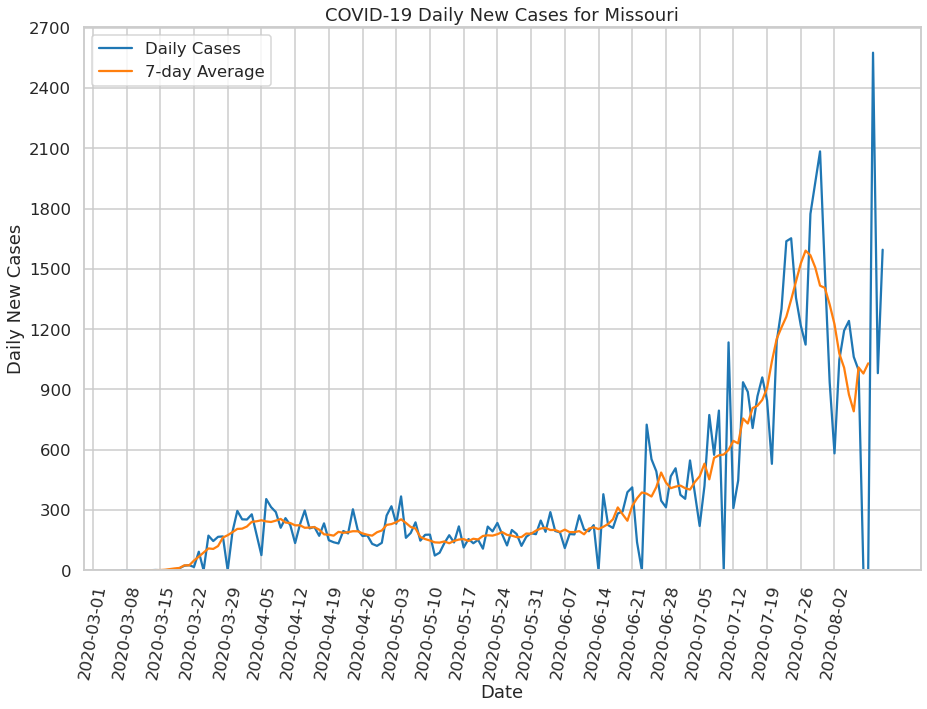

In [11]:
# use plot elements suitable for talks
sns.set_context("talk")
sns.set_style("whitegrid")
# set figure size
plt.figure(figsize=(15,10))
# Time series plot with label
sns.lineplot(x="date", y="positiveIncrease", label="Daily Cases", data=state_data, ci=None)
# 7-day rolling average
sns.lineplot(x="date", y="7dayAverage", label="7-day Average", data=state_data, ci=None)
# set plot elements
plt.title("COVID-19 Daily New Cases for %s" % abbrev_us_state[state])
plt.xlabel("Date")
plt.ylabel("Daily New Cases")
axis = list(plt.axis())
axis[2]=0
plt.axis(axis)
locs, labels = plt.xticks()
plt.xticks(np.arange(locs[0], locs[locs.size-1]+6, 7), rotation=80)
locs, labels = plt.yticks()
plt.yticks(np.arange(0, locs[locs.size-1], locs[locs.size-1] / 10))
plt.show()

## Display a time series plot for Daily Deaths

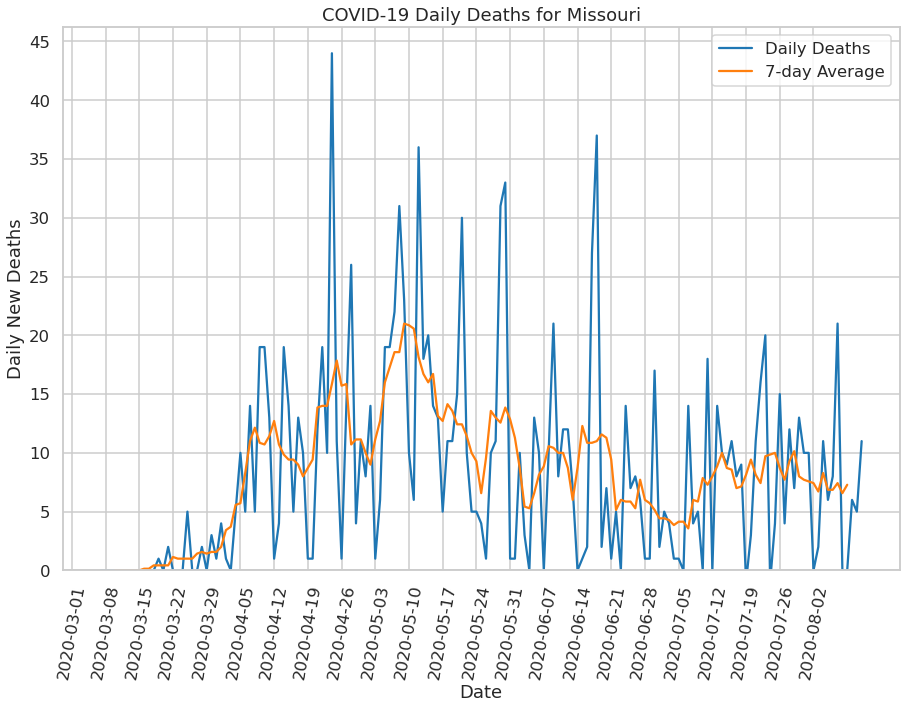

In [12]:
# use plot elements suitable for talks
sns.set_context("talk")
sns.set_style("whitegrid")
# set figure size
plt.figure(figsize=(15,10))
# Time series plot with label
sns.lineplot(x="date", y="deathIncrease", label="Daily Deaths", data=state_data, ci=None)
# 7-day rolling average
sns.lineplot(x="date", y="7DayAvgDeaths", label="7-day Average", data=state_data, ci=None)
# set plot elements
plt.title("COVID-19 Daily Deaths for %s" % abbrev_us_state[state])
plt.xlabel("Date")
plt.ylabel("Daily New Deaths")
axis = list(plt.axis())
axis[2]=0
plt.axis(axis)
locs, labels = plt.xticks()
plt.xticks(np.arange(locs[0], locs[locs.size-1]+6, 7), rotation=80)
locs, labels = plt.yticks()
plt.yticks(np.arange(0, locs[locs.size-1], locs[locs.size-1] / 10))
plt.show()

## Display Maps of COVID-19 Cases and Deaths per 100k Population by State

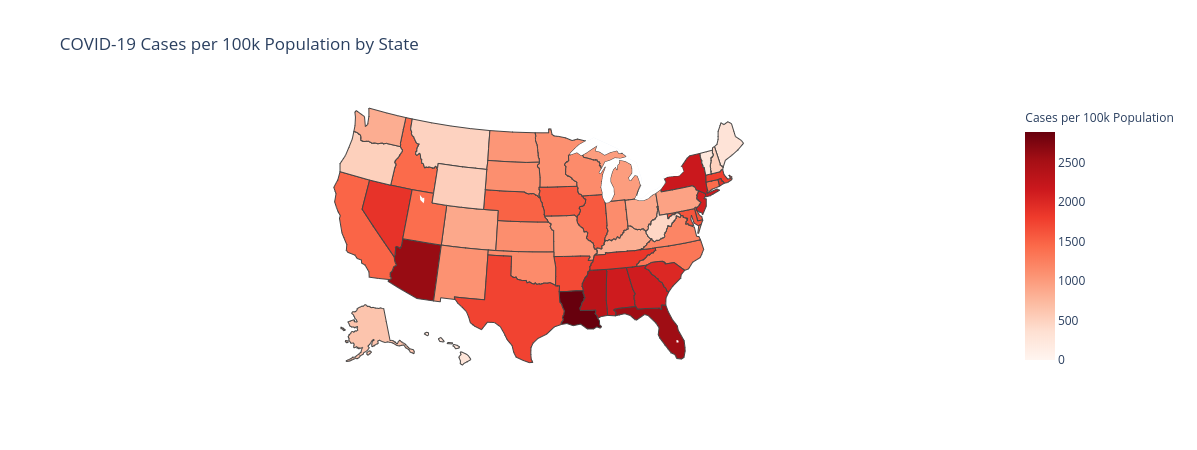

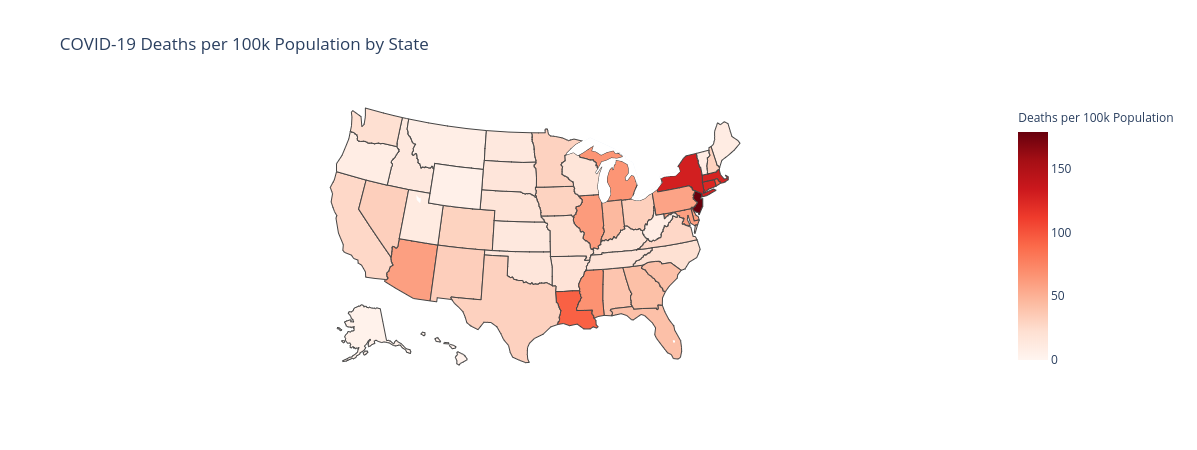

In [13]:
fig = go.Figure(data=go.Choropleth(
    locations=state_with_pop.index, # Spatial coordinates
    z = state_with_pop['cases per 100k pop'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Cases per 100k Population",
))

fig.update_layout(
    title_text = 'COVID-19 Cases per 100k Population by State',
    geo_scope='usa', # limit map scope to USA
)

fig.show()

fig = go.Figure(data=go.Choropleth(
    locations=state_with_pop.index,
    z = state_with_pop['deaths per 100k pop'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Deaths per 100k Population",
))

fig.update_layout(
    title_text = 'COVID-19 Deaths per 100k Population by State',
    geo_scope='usa',
)

fig.show()

## Track Weekly Change in Cases

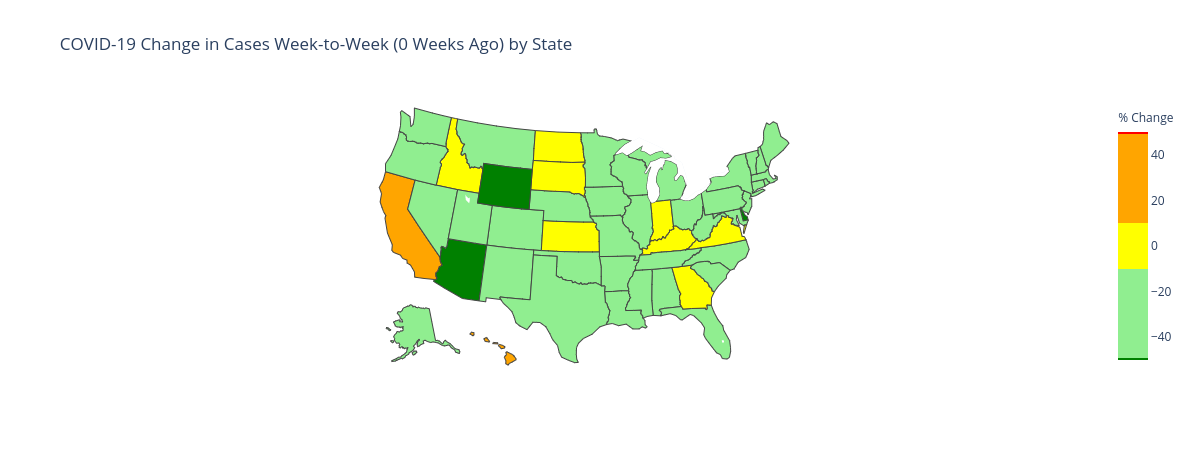

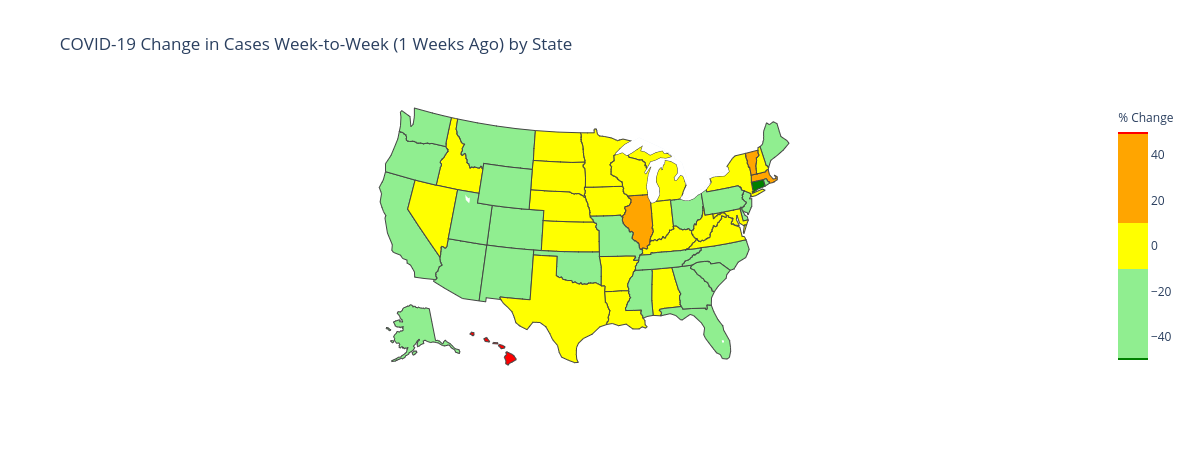

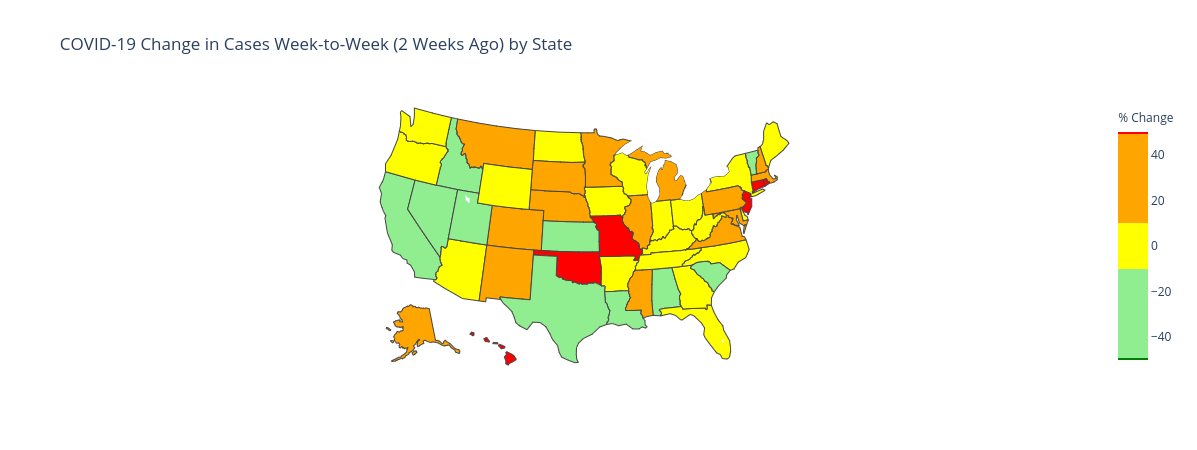

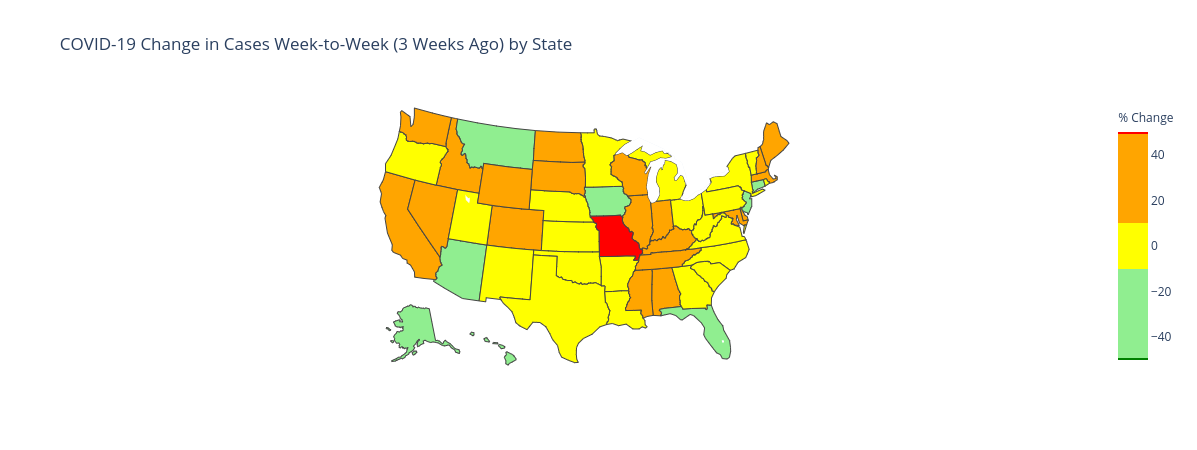

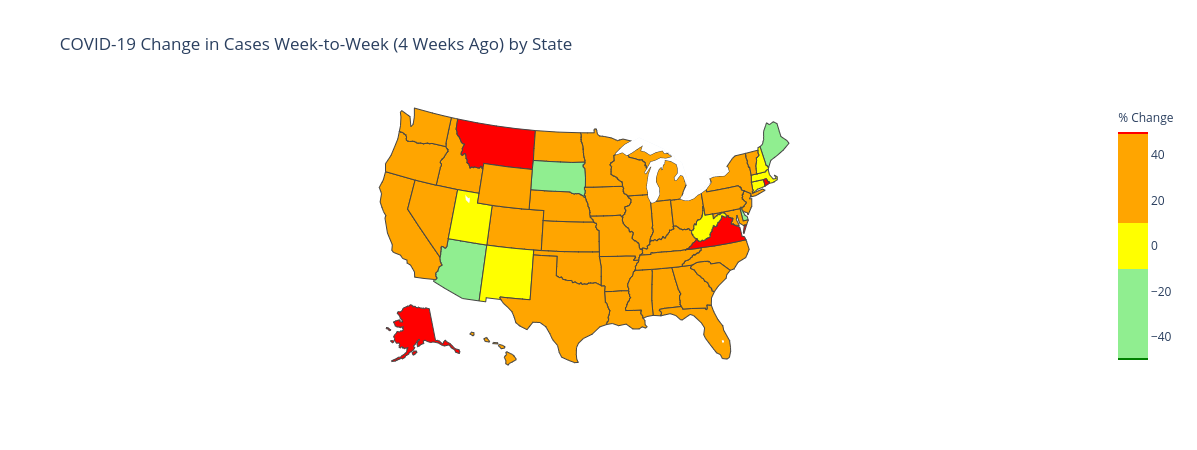

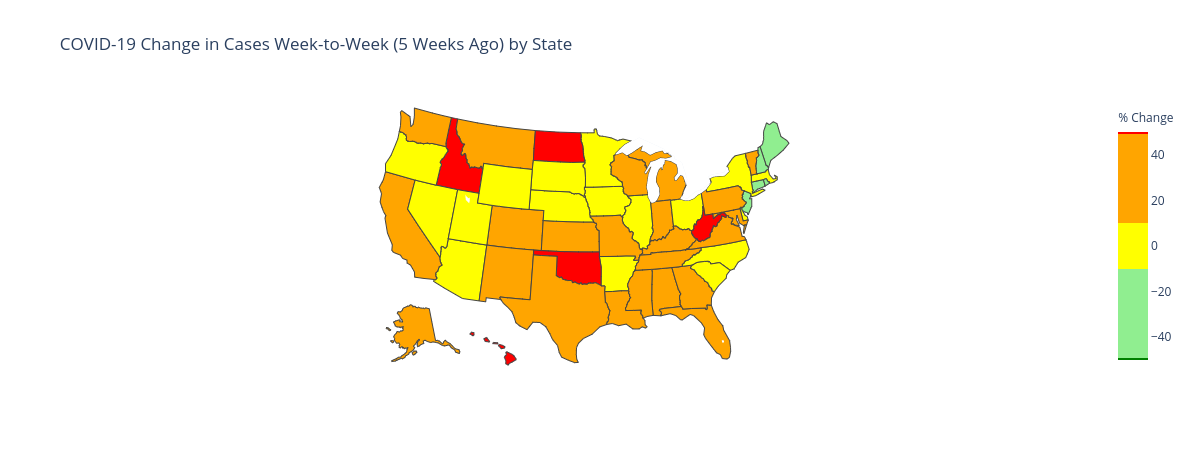

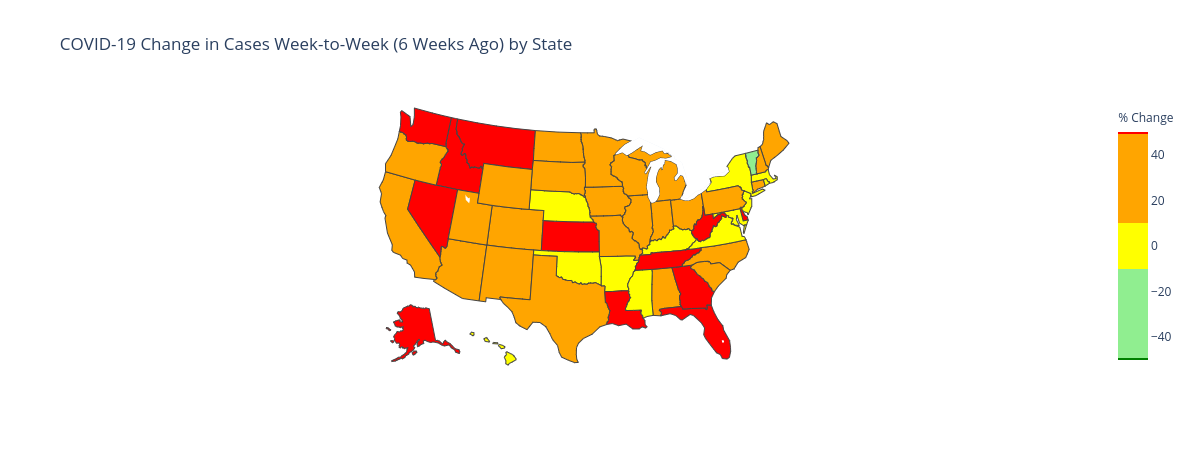

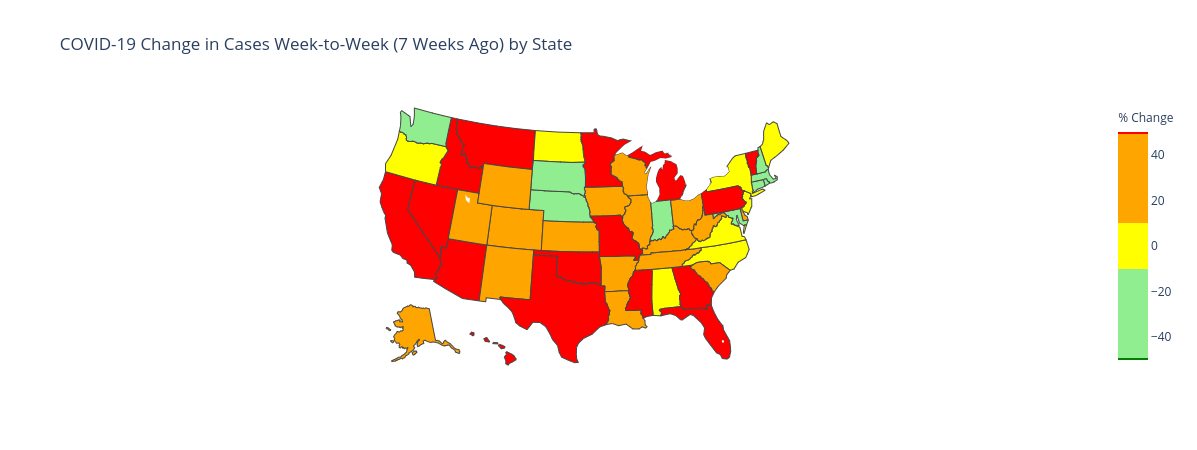

In [14]:
colorscale = [
    [0, 'green'],
    [0.01, 'green'],
    [0.0101, 'lightgreen'],
    [0.4, 'lightgreen'],
    [0.4001, 'yellow'],
    [0.6, 'yellow'],
    [0.6001, 'orange'],
    [0.99, 'orange'],
    [0.9901, 'red'],
    [1.0, 'red']]

weeks = range(8)
for weeks_ago in weeks:
    national_weekly = corona[['date', 'state', 'weeks ago', 'positiveIncrease', 'deathIncrease']]\
        .set_index('date').groupby(['state','weeks ago']).sum()
    diff = national_weekly.diff(periods=-1)\
        .rename(columns={"positiveIncrease": "change in cases", "deathIncrease": "change in deaths"})\
        .query("`weeks ago`==@weeks_ago")
    pct_change = national_weekly.pct_change(periods=-1)\
        .rename(columns={"positiveIncrease": "% change in cases", "deathIncrease": "% change in deaths"})\
        .query("`weeks ago`==@weeks_ago")
    last_week_change = pd.merge(national_weekly.query("`weeks ago`==@weeks_ago"), diff, on=['state','weeks ago'])\
        .rename(columns={"positiveIncrease": "new cases", "deathIncrease": "new deaths"})\
        .merge(pct_change, on=['state','weeks ago'])\
        .droplevel('weeks ago')
    #last_week_change.style.applymap(color_positive_red, subset=["change in cases", "change in deaths"])\
    #    .applymap(color_percent_positive_red, subset=["% change in cases", "% change in deaths"])\
    #    .format({'change in cases': '{:+.0f}', 'change in deaths': '{:+.0f}', '% change in cases': '{:+.2%}', '% change in deaths': '{:+.2%}'})

    fig = go.Figure(data=go.Choropleth(
        locations=last_week_change.index, # Spatial coordinates
        z = (last_week_change['% change in cases']*100).astype(float), # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorbar_title = "% Change",
        colorscale = colorscale,
        zmin = -50,
        zmax = 50,
        zmid = 0
    ))

    fig.update_layout(
        title_text = "COVID-19 Change in Cases Week-to-Week ({} Weeks Ago) by State".format(weeks_ago),
        geo_scope='usa', # limit map scope to USA
    )

    fig.show()